[2.5295639e+11 2.0807248e+10 8.1864724e+09 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[2.5295639e+11 2.0807248e+10 8.1864724e+09 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]


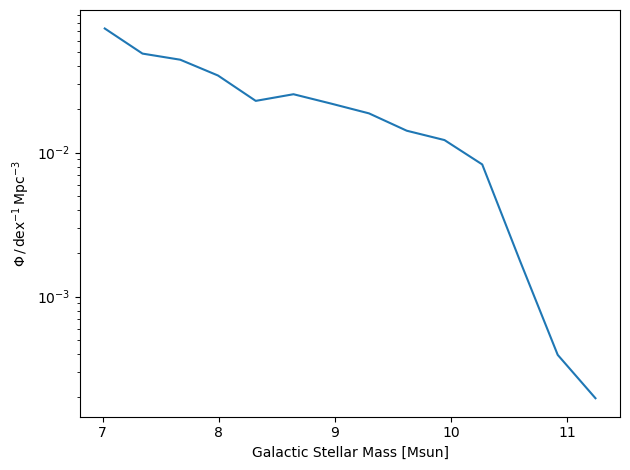

[2.5295639e+11 2.0807248e+10 8.1864724e+09 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]


(array([ 6.6939   ,  7.018668 ,  7.343437 ,  7.668206 ,  7.9929743,
         8.317743 ,  8.642511 ,  8.96728  ,  9.292049 ,  9.616817 ,
         9.9415865, 10.266355 , 10.591124 , 10.915893 , 11.240661 ],
       dtype=float32),
 array([0.00985317, 0.0727164 , 0.04867466, 0.04414221, 0.03428904,
        0.02285936, 0.02542118, 0.02187404, 0.01872102, 0.01418857,
        0.01221793, 0.00827666, 0.00177357, 0.00039413, 0.00019706]))

In [28]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def snapshot_graph(simulation_name): 
    num_snapshots = 1
    num_cols = 1
    num_rows = 1  
    
    #fig, axs = plt.subplots(num_rows, num_cols, figsize=(10 * num_cols, 5 * num_rows), sharex=True, sharey=True)  
    
    plot_count = 0
    
    num_bins = 15
    stellar_masses = []
    
    
    for i in range(32, 33):
        mass_list = []
        non_0_mass_list = []
        
        if i >= 10:
            result = i
        else:
            result = "0" + str(i)
        
        file_path = "/Users/itamargoshen/Desktop/snapshot_090.hdf5"
        f_catalog = "/Users/itamargoshen/Desktop/groups_090.hdf5"
        
        with h5py.File(file_path, "r") as data, h5py.File(f_catalog, 'r') as f:
            redshift = data["Header"].attrs["Redshift"]
            idex_main_subhalo = f['Group/GroupFirstSub'][:]
            halo_masses = f['Group/GroupMass'][:] * 1e10
            #stellar_masses = data["PartType4/Masses"][:] * 1e10
            stellar_masses = f["Subhalo/SubhaloMassInHalfRadType"][:,4] * 1e10
            print(stellar_masses) 
            formation_time = data["PartType4/GFM_StellarFormationTime"][:]
            stellar_masses = stellar_masses[stellar_masses > 0]
            
            #for j, mh in enumerate(halo_masses):
                #index_of_subhalo = idex_main_subhalo[j]
                #stellar_mass_of_subhalo = stellar_masses[index_of_subhalo]
           
                #if stellar_mass_of_subhalo > 0: 
                    #mass_list.append(stellar_mass_of_subhalo) 
                    #non_0_mass_list.append(mh)

                
        stellar_mass_list = np.array(stellar_masses)
        
        M     =  stellar_mass_list      #Read stellar masses in Msun
        logM  = np.log10(M)                     #Take logarithm
        nbins = 15                              #Number of bins to divide data into
        V     = 25 ** 3                            #Survey volume in Mpc3
        Phi,edg = np.histogram(logM,bins=nbins) #Unnormalized histogram and bin edges
        dM    = edg[1] - edg[0]                 #Bin size
        Max   = edg[0:-1] + dM/2.               #Mass axis
        Phi   = Phi / V / dM                    #Normalize to volume and bin size
        
        #plt.clf()
        #plt.yscale('log')
        #plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
        #plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')
        #plt.plot(Max,Phi,ls='-')
        
        plot_count += 1
        
    #plt.tight_layout() 
    #plt.show()
    
    return Max, Phi
    
tngmax, tngphi = snapshot_graph('IllustrisTNG') 

Max, Phi = snapshot_graph('SimbaTNG-EOStest_CAMELS') 


plt.clf()
plt.yscale('log')
plt.xlabel('Galactic Stellar Mass [Msun]')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')
#plt.plot(Max,Phi,ls='-', label = 'Broken')
plt.plot(tngmax[1:],tngphi[1:],ls='-')

plt.tight_layout() 
plt.show()
        
snapshot_graph('IllustrisTNG')